In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./database/GuildStashHistory.csv")

In [3]:
df = df.drop(["League"], axis=1)
df

,Date,Account,Action,Stash,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,$,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,$,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,$,221× Orb of Scouring
...,...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,$,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,$,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,$,Orb of Transmutation


In [4]:
df = df[df["Stash"] == "$"].drop(["Stash"], axis=1)
df

,Date,Account,Action,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation


In [5]:
df = df.reindex(index=df.index[::-1])
df

,Date,Account,Action,Item
27661,08/12/2023 20:16:41,ErZil,added,9× Transmutation Shard
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
...,...,...,...,...
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring


In [6]:
def strItemRead(itemStr):
    if itemStr[0].isdigit():
        ndigits = 0
        for i in itemStr:
            if i.isdigit():
                ndigits += 1
        nbItem = int(itemStr[0:ndigits])
        item = itemStr[ndigits+2:]
    else:
        item = itemStr
        nbItem = 1
    return nbItem, item

print(strItemRead("1x Divine Orb"))
print(strItemRead("level 1 0% Fireball"))

(1, 'Divine Orb')
(1, 'level 1 0% Fireball')


In [7]:
Stash = []
Diff = []

for index, row in df.iterrows():
    previous_state = Stash[-1] if len(Stash) > 0 else None
    updated_state = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    if previous_state is None:
        stash_state = updated_state
    else:
        stash_state = {**previous_state, **updated_state}

    stash_diff = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    nbItem, item = strItemRead(row["Item"])

    if row["Action"] == "added":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem

    elif row["Action"] == "removed":
        stash_state[item] -= nbItem
        stash_diff[item] = -nbItem

    elif row["Action"] == "modified":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem - Stash[-1][item]
        
    Stash.append(stash_state)
    Diff.append(stash_diff)

df_Stash = pd.DataFrame(Stash)
df_Diff = pd.DataFrame(Diff)

In [8]:
import matplotlib.dates as mdates

In [9]:
df_Stash["Datetime"] = pd.to_datetime(df_Stash["Datetime"], format="%d/%m/%Y %H:%M:%S")

In [10]:
df_Stash["Datetime"][1000]

Timestamp('2023-12-09 22:03:54')

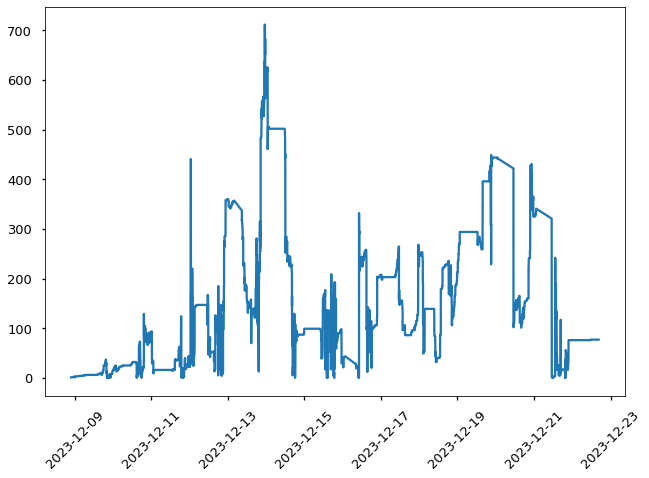

In [11]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')

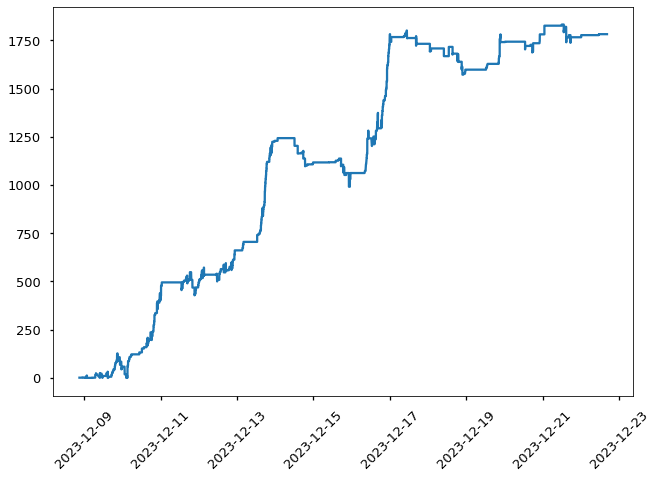

In [12]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')

In [82]:
#hand written data from Divine Orb/Chaos Orb ratio from poe.ninja

Div_History = [40, 87, 103, 133, 138, 145, 155, 168, 172, 172, 172, 175, 178, 185, 195, 200, 211, 213, 215, 215, 215, 215, 215, 215, 215, 215, 215]
Date_Div = [datetime.date(2023, 12, 8), 
            datetime.date(2023, 12, 9),
            datetime.date(2023, 12, 10),
            datetime.date(2023, 12, 11),
            datetime.date(2023, 12, 12),
            datetime.date(2023, 12, 13),
            datetime.date(2023, 12, 14),
            datetime.date(2023, 12, 15),
            datetime.date(2023, 12, 16),
            datetime.date(2023, 12, 17),
            datetime.date(2023, 12, 18),
            datetime.date(2023, 12, 19),
            datetime.date(2023, 12, 20),
            datetime.date(2023, 12, 21),
            datetime.date(2023, 12, 22),
            datetime.date(2023, 12, 23),
            datetime.date(2023, 12, 24),
            datetime.date(2023, 12, 25),
            datetime.date(2023, 12, 26),
            datetime.date(2023, 12, 27),
            datetime.date(2023, 12, 28),
            datetime.date(2023, 12, 29),
            datetime.date(2023, 12, 30),
            datetime.date(2023, 12, 31),
            datetime.date(2024, 1, 1),
            datetime.date(2024, 1, 2),
            datetime.date(2024, 1, 3)
            ]


def getDivineRatio(date):
    for i in range(len(Date_Div)):
        if date <= Date_Div[i]:
            return Div_History[i]
    return Div_History[-1]

df_Stash["Date"] = pd.to_datetime(df_Stash["Datetime"], format = "%d/%m/%Y %H:%M:%S").dt.date

In [14]:
getDivineRatio(df_Stash["Date"][5000])

138

In [15]:
CurrencySeries = df_Stash["Chaos Orb"]/df_Stash["Date"].apply(getDivineRatio) + df_Stash["Divine Orb"]

In [16]:
CurrencySeries.fillna(0, inplace=True)

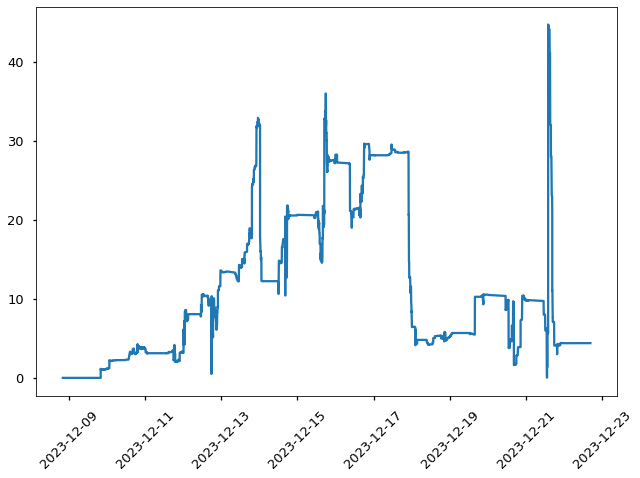

In [17]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')

In [18]:
df_Diff["Date"] = pd.to_datetime(df_Diff["Datetime"], format = "%d/%m/%Y %H:%M:%S").dt.date
df_DiffLuac = df_Diff[df_Diff["Account"] == "ErZil"].fillna(0)

In [19]:
df_DiffLuac

,Datetime,Account,Transmutation Shard,Orb of Transmutation,level 1 0% Fireball,Orb of Augmentation,Blacksmith's Whetstone,Scroll Fragment,Alchemy Shard,Alteration Shard,...,Mysterious Incubator,Crusader's Exalted Orb,Eldritch Exalted Orb,Sacred Orb,Bramblejack Plate Vest,Warlord's Exalted Orb,Elevated Sextant,Charged Compass,Screaming Essence of Dread,Date
0,08/12/2023 20:16:41,ErZil,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
1,08/12/2023 20:16:43,ErZil,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
2,08/12/2023 20:33:19,ErZil,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
3,08/12/2023 20:33:19,ErZil,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
4,08/12/2023 20:33:19,ErZil,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15815,21/12/2023 16:59:32,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-21
15816,21/12/2023 16:59:33,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-21
15817,21/12/2023 16:59:34,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-21
15818,21/12/2023 16:59:35,ErZil,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-21


In [20]:
df_SummedLuac = df_DiffLuac.drop(["Datetime", "Account", "Date"], axis=1)
df_SummedLuac.reset_index(drop=True, inplace=True)

for index, row in df_SummedLuac.iterrows():
    if index != 0:
        df_SummedLuac.iloc[index] = df_SummedLuac.iloc[index-1] + df_SummedLuac.iloc[index]

In [21]:
SeriesDates = df_DiffLuac["Date"]
SeriesDates.reset_index(drop=True, inplace=True)

In [22]:
SeriesDates

0       2023-12-08
1       2023-12-08
2       2023-12-08
3       2023-12-08
4       2023-12-08
           ...    
6002    2023-12-21
6003    2023-12-21
6004    2023-12-21
6005    2023-12-21
6006    2023-12-21
Name: Date, Length: 6007, dtype: object

In [23]:
df_SummedLuac["Date"] = SeriesDates

In [24]:
df_SummedLuac

,Transmutation Shard,Orb of Transmutation,level 1 0% Fireball,Orb of Augmentation,Blacksmith's Whetstone,Scroll Fragment,Alchemy Shard,Alteration Shard,Orb of Alteration,Orb of Alchemy,...,Mysterious Incubator,Crusader's Exalted Orb,Eldritch Exalted Orb,Sacred Orb,Bramblejack Plate Vest,Warlord's Exalted Orb,Elevated Sextant,Charged Compass,Screaming Essence of Dread,Date
0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
1,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
2,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
3,9.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
4,9.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,6.0,1654.0,0.0,863.0,494.0,-1.0,11.0,105.0,950.0,346.0,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2023-12-21
6003,6.0,1654.0,0.0,863.0,494.0,-1.0,11.0,105.0,950.0,346.0,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2023-12-21
6004,6.0,1654.0,0.0,863.0,494.0,-1.0,11.0,105.0,950.0,346.0,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2023-12-21
6005,6.0,1654.0,0.0,869.0,494.0,-1.0,11.0,105.0,950.0,346.0,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2023-12-21


In [25]:
CurrencySeriesLuac = df_SummedLuac["Chaos Orb"] / df_SummedLuac["Date"].apply(getDivineRatio) + df_SummedLuac["Divine Orb"]

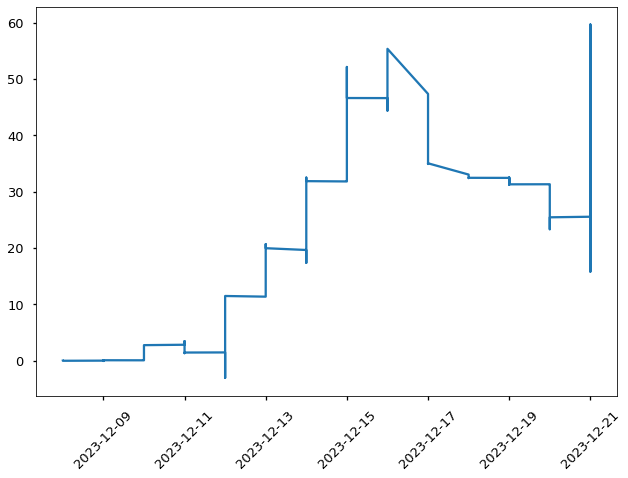

In [26]:
dates = mdates.date2num(df_DiffLuac["Date"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeriesLuac, linestyle='solid', marker='None')

In [155]:
# Function to plot the evolution of a players contribution to the guild stash's currencies (div and chaos)

def plotPlayerContribution(playerName):
    df_DiffPlayer = df_Diff[df_Diff["Account"] == playerName].fillna(0)
    df_SummedPlayer = df_DiffPlayer.drop(["Datetime", "Account", "Date"], axis=1)
    df_SummedPlayer.reset_index(drop=True, inplace=True)

    for index, row in df_SummedPlayer.iterrows():
        if index != 0:
            df_SummedPlayer.iloc[index] = df_SummedPlayer.iloc[index-1] + df_SummedPlayer.iloc[index]

    SeriesDates = df_DiffPlayer["Date"]
    SeriesDates.reset_index(drop=True, inplace=True)

    df_SummedPlayer["Date"] = SeriesDates

    CurrencySeriesPlayer = df_SummedPlayer["Chaos Orb"] / df_SummedPlayer["Date"].apply(getDivineRatio) + df_SummedPlayer["Divine Orb"] 

    dates = mdates.date2num(df_DiffPlayer["Date"])
    plt.style.use('seaborn-talk')
    plt.xticks(rotation=45)
    plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
    plt.legend()

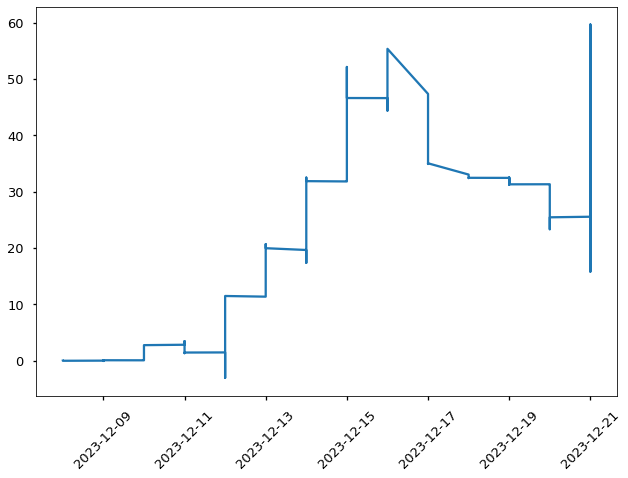

In [28]:
plotPlayerContribution("ErZil")

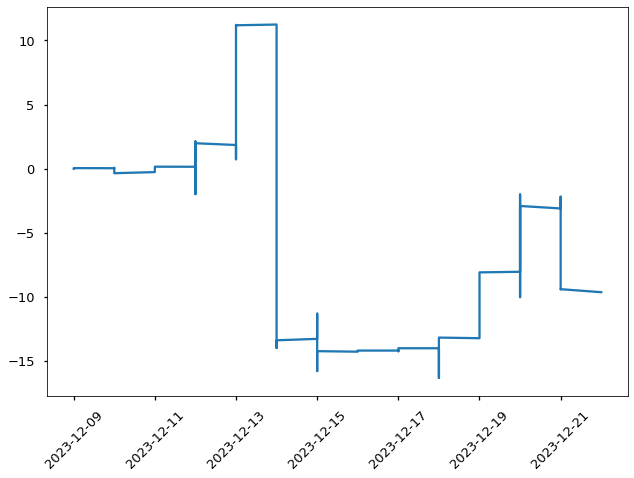

In [29]:
plotPlayerContribution("ThrarThylnenfallën")

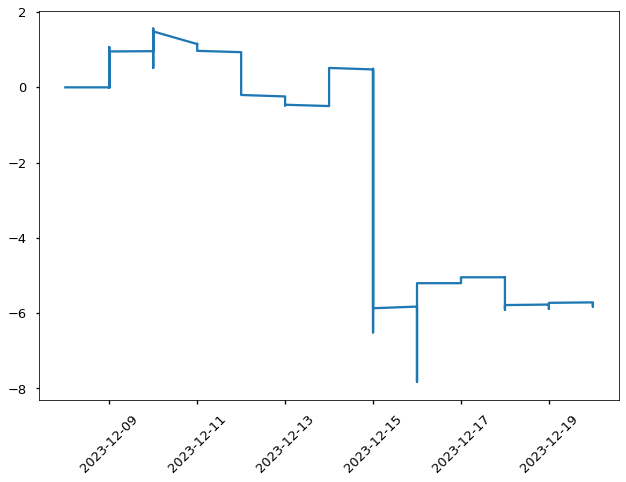

In [30]:
plotPlayerContribution("Tio1122")

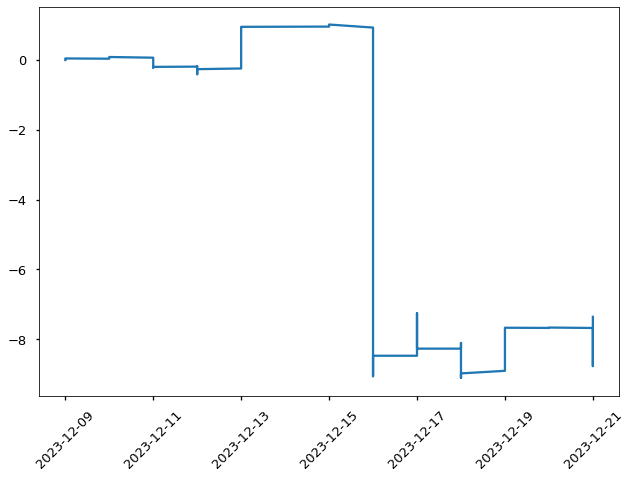

In [31]:
plotPlayerContribution("Without_Milk")

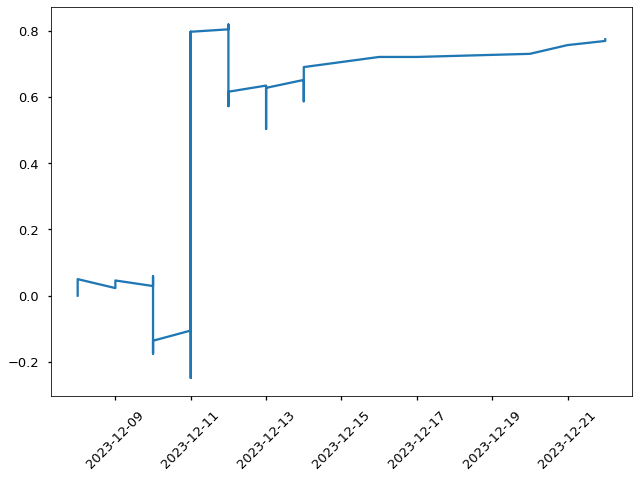

In [32]:
plotPlayerContribution("DrScramble")

In [33]:
def avg_onperiod(df, tdelta):
    # Takes in argument a Dataframe with a "Datetime" column and calculate the weighted average over such a period
    # tdelta is a datetime.timedelta object
    # Returns a new Dataframe with averaged values and a "Datetime" column

    Bondaries = [df["Datetime"][0]]
    window_right_bondary = df["Datetime"][0] + tdelta
    Bondaries.append(window_right_bondary)

    # Plateau is a list of tuples (plateau value, plateau length)
    Plateau = []

    for index, row in df.iterrows():

        if index != 0 and row["Datetime"] < window_right_bondary:

            present_datetime = row["Datetime"]
            previous_datetime = df["Datetime"][index-1]

            plateau_tdelta = present_datetime - previous_datetime
            plateau_value = (df["Chaos Orb"][index-1] + df["Chaos Orb"][index])/2

            Plateau.append((plateau_value, plateau_tdelta))

        elif index != 0 and row["Datetime"] >= window_right_bondary:
            #TODO: fix this part

            present_datetime = row["Datetime"]
            previous_datetime = df["Datetime"][index-1]

            plateau_tdelta = window_right_bondary - previous_datetime
            plateau_value = (df["Chaos Orb"][index-1] + df["Chaos Orb"][index])/2

            Plateau.append((plateau_value, plateau_tdelta))

            Bondaries.append(window_right_bondary)
            window_right_bondary += tdelta

    
    

In [128]:
# Updated datas

dfpart1 = pd.read_csv("./database/GuildStashHistory.csv")
dfpart2 = pd.read_csv("./database/GuildStashHistory2.csv")

dfpart1["Date"] = pd.to_datetime(dfpart1["Date"], format="%d/%m/%Y %H:%M:%S")
dfpart2["Date"] = pd.to_datetime(dfpart2["Date"], format="%d/%m/%Y %H:%M:%S")

In [129]:
dfpart1[dfpart1["Date"] < pd.Timestamp(2023, 12, 22)]

,Date,League,Account,Action,Stash,Item
104,2023-12-21 22:08:09,Affliction,Without_Milk,modified,D,16× Hunter's Resolve
105,2023-12-21 22:08:09,Affliction,Without_Milk,modified,D,27× The Stormcaller
106,2023-12-21 22:08:09,Affliction,Without_Milk,modified,D,6× Lucky Connections
107,2023-12-21 22:08:08,Affliction,Without_Milk,modified,D,20× The Cache
108,2023-12-21 22:08:07,Affliction,Without_Milk,modified,D,32× The Gemcutter
...,...,...,...,...,...,...
27657,2023-12-08 20:33:19,Affliction,ErZil,added,$,2× Blacksmith's Whetstone
27658,2023-12-08 20:33:19,Affliction,ErZil,added,$,Orb of Augmentation
27659,2023-12-08 20:33:19,Affliction,ErZil,added,$,level 1 0% Fireball
27660,2023-12-08 20:16:43,Affliction,ErZil,added,$,Orb of Transmutation


In [130]:
dffused = pd.concat([dfpart2, dfpart1[dfpart1["Date"] < pd.Timestamp(2023, 12, 22)]])

In [131]:
dffused = dffused.reset_index(drop=True)

In [132]:
dffused

,Date,League,Account,Action,Stash,Item
0,2024-01-03 14:13:15,Affliction,ErZil,modified,$,22× Vaal Scouting Report
1,2024-01-03 14:13:13,Affliction,ErZil,removed,$,6× Singular Scouting Report
2,2024-01-03 14:13:12,Affliction,ErZil,modified,$,2× Vaal Scouting Report
3,2024-01-03 14:12:03,Affliction,ErZil,modified,$,13× Alteration Shard
4,2024-01-03 14:11:38,Affliction,ErZil,modified,$,3× Orb of Conflict
...,...,...,...,...,...,...
44507,2023-12-08 20:33:19,Affliction,ErZil,added,$,2× Blacksmith's Whetstone
44508,2023-12-08 20:33:19,Affliction,ErZil,added,$,Orb of Augmentation
44509,2023-12-08 20:33:19,Affliction,ErZil,added,$,level 1 0% Fireball
44510,2023-12-08 20:16:43,Affliction,ErZil,added,$,Orb of Transmutation


In [133]:
dffused.to_csv("./database/Guildstash")

In [134]:
dffused = dffused.drop(["League"], axis=1)
dffused

,Date,Account,Action,Stash,Item
0,2024-01-03 14:13:15,ErZil,modified,$,22× Vaal Scouting Report
1,2024-01-03 14:13:13,ErZil,removed,$,6× Singular Scouting Report
2,2024-01-03 14:13:12,ErZil,modified,$,2× Vaal Scouting Report
3,2024-01-03 14:12:03,ErZil,modified,$,13× Alteration Shard
4,2024-01-03 14:11:38,ErZil,modified,$,3× Orb of Conflict
...,...,...,...,...,...
44507,2023-12-08 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
44508,2023-12-08 20:33:19,ErZil,added,$,Orb of Augmentation
44509,2023-12-08 20:33:19,ErZil,added,$,level 1 0% Fireball
44510,2023-12-08 20:16:43,ErZil,added,$,Orb of Transmutation


In [135]:
dffused = dffused[dffused["Stash"] == "$"].drop(["Stash"], axis=1)
dffused

,Date,Account,Action,Item
0,2024-01-03 14:13:15,ErZil,modified,22× Vaal Scouting Report
1,2024-01-03 14:13:13,ErZil,removed,6× Singular Scouting Report
2,2024-01-03 14:13:12,ErZil,modified,2× Vaal Scouting Report
3,2024-01-03 14:12:03,ErZil,modified,13× Alteration Shard
4,2024-01-03 14:11:38,ErZil,modified,3× Orb of Conflict
...,...,...,...,...
44507,2023-12-08 20:33:19,ErZil,added,2× Blacksmith's Whetstone
44508,2023-12-08 20:33:19,ErZil,added,Orb of Augmentation
44509,2023-12-08 20:33:19,ErZil,added,level 1 0% Fireball
44510,2023-12-08 20:16:43,ErZil,added,Orb of Transmutation


In [136]:
dffused = dffused.reindex(index=dffused.index[::-1])
dffused

,Date,Account,Action,Item
44511,2023-12-08 20:16:41,ErZil,added,9× Transmutation Shard
44510,2023-12-08 20:16:43,ErZil,added,Orb of Transmutation
44509,2023-12-08 20:33:19,ErZil,added,level 1 0% Fireball
44508,2023-12-08 20:33:19,ErZil,added,Orb of Augmentation
44507,2023-12-08 20:33:19,ErZil,added,2× Blacksmith's Whetstone
...,...,...,...,...
4,2024-01-03 14:11:38,ErZil,modified,3× Orb of Conflict
3,2024-01-03 14:12:03,ErZil,modified,13× Alteration Shard
2,2024-01-03 14:13:12,ErZil,modified,2× Vaal Scouting Report
1,2024-01-03 14:13:13,ErZil,removed,6× Singular Scouting Report


In [137]:
Stash = []
Diff = []

for index, row in dffused.iterrows():
    previous_state = Stash[-1] if len(Stash) > 0 else None
    updated_state = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    if previous_state is None:
        stash_state = updated_state
    else:
        stash_state = {**previous_state, **updated_state}

    stash_diff = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    nbItem, item = strItemRead(row["Item"])

    if row["Action"] == "added":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem

    elif row["Action"] == "removed":
        stash_state[item] -= nbItem
        stash_diff[item] = -nbItem

    elif row["Action"] == "modified":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem - Stash[-1][item]
        
    Stash.append(stash_state)
    Diff.append(stash_diff)

df_Stash = pd.DataFrame(Stash)
df_Diff = pd.DataFrame(Diff)

In [148]:
df_Diff["Date"] = df_Diff["Datetime"]
df_Stash["Date"] = df_Stash["Datetime"]

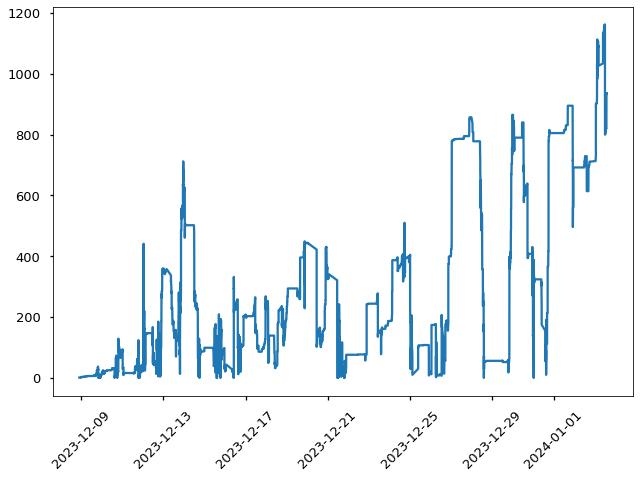

In [138]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')

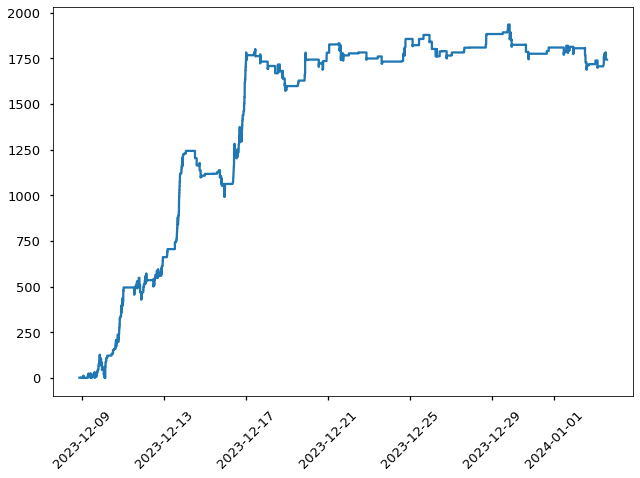

In [139]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')

In [141]:
CurrencySeries = df_Stash["Chaos Orb"]/df_Stash["Datetime"].apply(getDivineRatio) + df_Stash["Divine Orb"]

In [142]:
CurrencySeries.fillna(0, inplace=True)

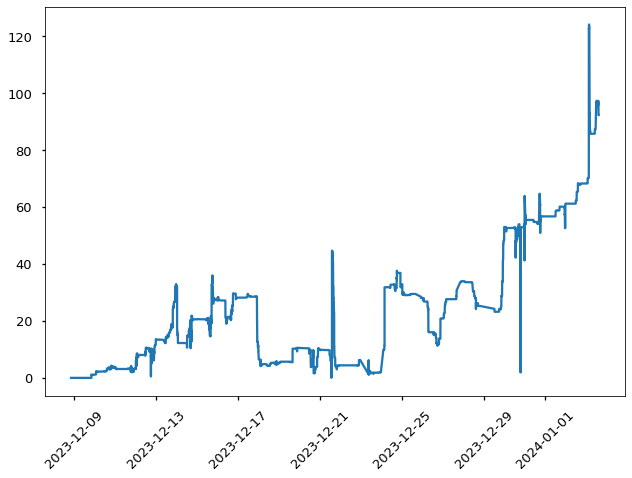

In [143]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.style.use('seaborn-talk')
plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')

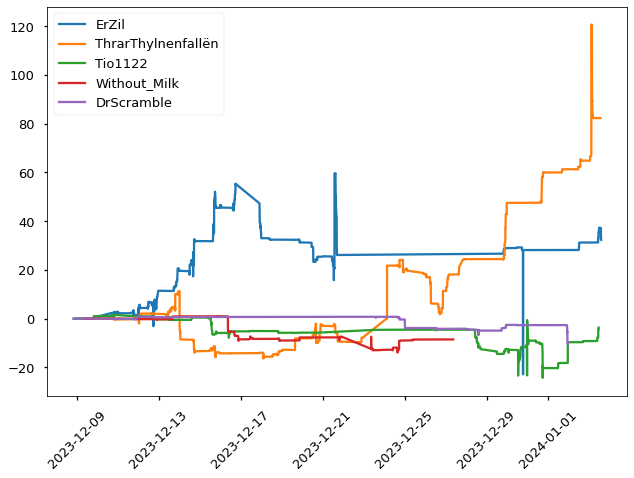

In [156]:
plotPlayerContribution("ErZil")
plotPlayerContribution("ThrarThylnenfallën")
plotPlayerContribution("Tio1122")
plotPlayerContribution("Without_Milk")
plotPlayerContribution("DrScramble")